In [231]:
#importing needed ibraraies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error
)

warnings.filterwarnings("ignore")



In [233]:
# Load recall dataset
data = pd.read_csv("Recalls_Data.csv")

# Display first and last few rows
data.head(5)



,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Park Outside Advisory,Do Not Drive Advisory,Completion Rate % (Blank - Not Reported)
0,12/03/2025,25V836000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Volkswagen Group of America, Inc.",High Voltage Battery May Catch Fire,ELECTRICAL SYSTEM,93EV,Vehicle,311,"Volkswagen Group of America, Inc. (Volkswagen)...",A vehicle fire while parked or driving can inc...,Owners are advised to park outside immediately...,Yes,No,NaN
1,12/03/2025,25V835000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Volkswagen Group of America, Inc.",Wheel May Detach from Vehicle,WHEELS,44BW,Vehicle,27,"Volkswagen Group of America, Inc. (Volkswagen)...",Incorrect wheel bolts can allow a wheel to det...,Owners are advised not to drive their vehicles...,No,Yes,NaN
2,12/02/2025,25V833000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Hyundai Motor America,Sudden Unintended Braking,ELECTRICAL SYSTEM,030G,Vehicle,483,Hyundai Motor America (Hyundai) is recalling c...,"Sudden, unintended braking increases the risk ...",Owners are advised not to use the Highway Driv...,No,No,NaN
3,12/01/2025,25V832000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Virnig Manufacturing Inc.,Bearing Lock Nut Failure Can Cause Tire to Detach,SUSPENSION,NaN,Vehicle,10,Virnig Manufacturing Inc. (Virnig) is recallin...,A bearing lock nut failure can cause the tire ...,Dealers will inspect and replace the bearing l...,No,Yes,NaN
4,12/01/2025,25V831000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Inoperative Rear Lightbar/FMVSS 108,NaN,25C66,Vehicle,1195,Ford Motor Company (Ford) is recalling certain...,Inoperative or flickering reverse lights may n...,"Dealers will replace the rear lightbar, free o...",No,No,NaN


In [235]:
# Shape of dataset
print("Dataset Shape:", data.shape)

# Dataset information
data.info()


Dataset Shape: (29566, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29566 entries, 0 to 29565
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Report Received Date                      29566 non-null  object 
 1   NHTSA ID                                  29566 non-null  object 
 2   Recall Link                               29566 non-null  object 
 3   Manufacturer                              29566 non-null  object 
 4   Subject                                   29566 non-null  object 
 5   Component                                 22005 non-null  object 
 6   Mfr Campaign Number                       29387 non-null  object 
 7   Recall Type                               29566 non-null  object 
 8   Potentially Affected                      29566 non-null  int64  
 9   Recall Description                        27165 non-null  object 
 10  Consequ

In [237]:
data = data[data["Recall Type"].str.lower() == "vehicle"]


In [239]:
# Check missing values
data.isnull().sum()


Report Received Date                            0
NHTSA ID                                        0
Recall Link                                     0
Manufacturer                                    0
Subject                                         0
Component                                    6210
Mfr Campaign Number                           125
Recall Type                                     0
Potentially Affected                            0
Recall Description                           2178
Consequence Summary                          4121
Corrective Action                            2165
Park Outside Advisory                           0
Do Not Drive Advisory                           0
Completion Rate % (Blank - Not Reported)    15891
dtype: int64

In [241]:
# Drop irrelevant columns (example)
data = data.drop(columns=['Report Received Date','Mfr Campaign Number','Recall Type','Recall Link','Recall Description','Consequence Summary',
                          'Corrective Action','NHTSA ID','Completion Rate % (Blank - Not Reported)'], errors='ignore')


In [243]:
data.columns


Index(['Manufacturer', 'Subject', 'Component', 'Potentially Affected',
       'Park Outside Advisory ', 'Do Not Drive Advisory'],
      dtype='object')

In [245]:
data.isnull().sum()


Manufacturer                 0
Subject                      0
Component                 6210
Potentially Affected         0
Park Outside Advisory        0
Do Not Drive Advisory        0
dtype: int64

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25743 entries, 0 to 29565
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Manufacturer            25743 non-null  object
 1   Subject                 25743 non-null  object
 2   Component               19533 non-null  object
 3   Potentially Affected    25743 non-null  int64 
 4   Park Outside Advisory   25743 non-null  object
 5   Do Not Drive Advisory   25743 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [249]:
data.dropna(inplace=True)

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19533 entries, 0 to 29565
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Manufacturer            19533 non-null  object
 1   Subject                 19533 non-null  object
 2   Component               19533 non-null  object
 3   Potentially Affected    19533 non-null  int64 
 4   Park Outside Advisory   19533 non-null  object
 5   Do Not Drive Advisory   19533 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [255]:
data["Do Not Drive Advisory"].unique()


array(['No', 'Yes'], dtype=object)

In [257]:
data["Do Not Drive Advisory"] = (
    data["Do Not Drive Advisory"]
    .map({"Yes": 1, "No": 0})
    .astype(int)
)

data["Park Outside Advisory "] = (
    data["Park Outside Advisory "]
    .map({"Yes": 1, "No": 0})
    .astype(int)
)


In [259]:
data["Do Not Drive Advisory"].unique()


array([0, 1])

In [261]:
data.head(5)

,Manufacturer,Subject,Component,Potentially Affected,Park Outside Advisory,Do Not Drive Advisory
0,"Volkswagen Group of America, Inc.",High Voltage Battery May Catch Fire,ELECTRICAL SYSTEM,311,1,0
1,"Volkswagen Group of America, Inc.",Wheel May Detach from Vehicle,WHEELS,27,0,1
2,Hyundai Motor America,Sudden Unintended Braking,ELECTRICAL SYSTEM,483,0,0
3,Virnig Manufacturing Inc.,Bearing Lock Nut Failure Can Cause Tire to Detach,SUSPENSION,10,0,1
5,Ford Motor Company,Liftgate Hinge Covers May Detach,STRUCTURE,108762,0,0


In [263]:
# Create Severity column: 1 if either advisory is 1, else 0
data['Severity'] = ((data['Do Not Drive Advisory'] == 1) | 
                    (data['Park Outside Advisory '] == 1)).astype(int)

In [265]:
print(data['Severity'].value_counts())



Severity
0    19325
1      208
Name: count, dtype: int64


In [267]:
data = data.drop(
    columns=[
        'Park Outside Advisory ',
        'Do Not Drive Advisory'
    ]
)

In [269]:
data.head(5)

,Manufacturer,Subject,Component,Potentially Affected,Severity
0,"Volkswagen Group of America, Inc.",High Voltage Battery May Catch Fire,ELECTRICAL SYSTEM,311,1
1,"Volkswagen Group of America, Inc.",Wheel May Detach from Vehicle,WHEELS,27,1
2,Hyundai Motor America,Sudden Unintended Braking,ELECTRICAL SYSTEM,483,0
3,Virnig Manufacturing Inc.,Bearing Lock Nut Failure Can Cause Tire to Detach,SUSPENSION,10,1
5,Ford Motor Company,Liftgate Hinge Covers May Detach,STRUCTURE,108762,0


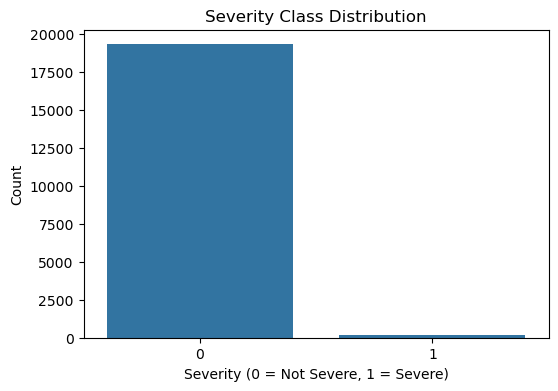

In [271]:

plt.figure(figsize=(6,4))
sns.countplot(x='Severity', data=data)
plt.title('Severity Class Distribution')
plt.xlabel('Severity (0 = Not Severe, 1 = Severe)')
plt.ylabel('Count')
plt.show()

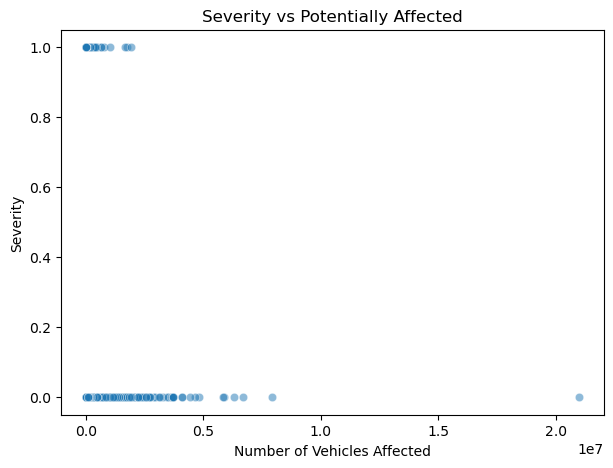

In [275]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Potentially Affected',
    y='Severity',
    data=data,
    alpha=0.5
)
plt.title('Severity vs Potentially Affected')
plt.xlabel('Number of Vehicles Affected')
plt.ylabel('Severity')
plt.show()


In [277]:
data = pd.concat([
    data[data['Severity'] == 0].sample(n=5000, random_state=42),
    data[data['Severity'] == 1]
])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check counts
print(data['Severity'].value_counts())

Severity
0    5000
1     208
Name: count, dtype: int64


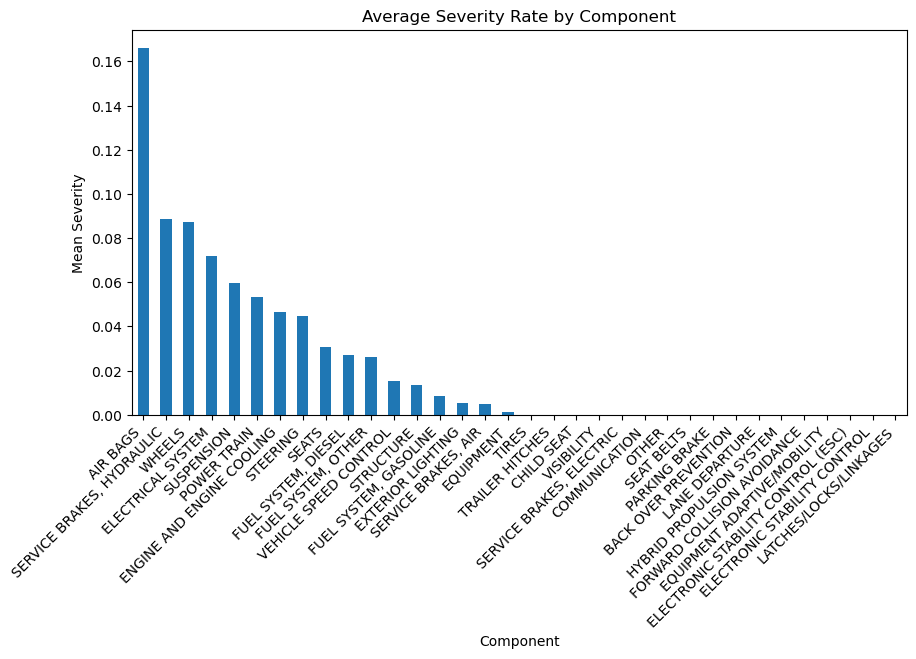

In [279]:
component_severity = (
    data.groupby('Component')['Severity']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
component_severity.plot(kind='bar')
plt.title('Average Severity Rate by Component')
plt.ylabel('Mean Severity')
plt.xlabel('Component')
plt.xticks(rotation=45, ha='right')
plt.show()


In [281]:
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()          # new encoder for each column
    data[col] = le.fit_transform(data[col])

In [283]:
X = data.drop(columns=['Severity'], errors='ignore')
y = data['Severity']

In [285]:
data.head(5)


,Manufacturer,Subject,Component,Potentially Affected,Severity
0,425,2850,17,341003,0
1,225,1070,8,4500,0
2,600,2060,7,35,0
3,451,3121,28,87,0
4,389,766,0,308992,1


In [287]:
print(data['Severity'].value_counts())

Severity
0    5000
1     208
Name: count, dtype: int64


In [289]:
unique_values = data['Component'].unique()
print("Unique components:", unique_values)

Unique components: [17  8  7 28  0 26  4 22 13 32  2 20 27 10  5 29 25 12 21 23 11 14  1 33
 18 19 31 30 16  6  9 15 24  3]


In [291]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [293]:
print(data.dtypes)

Manufacturer            int32
Subject                 int32
Component               int32
Potentially Affected    int64
Severity                int32
dtype: object


In [295]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [297]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9596928982725528
[[1000    0]
 [  42    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1000
           1       0.00      0.00      0.00        42

    accuracy                           0.96      1042
   macro avg       0.48      0.50      0.49      1042
weighted avg       0.92      0.96      0.94      1042



In [299]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.946257197696737
[[967  33]
 [ 23  19]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1000
           1       0.37      0.45      0.40        42

    accuracy                           0.95      1042
   macro avg       0.67      0.71      0.69      1042
weighted avg       0.95      0.95      0.95      1042



In [301]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9664107485604606
[[994   6]
 [ 29  13]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1000
           1       0.68      0.31      0.43        42

    accuracy                           0.97      1042
   macro avg       0.83      0.65      0.70      1042
weighted avg       0.96      0.97      0.96      1042



In [303]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9568138195777351
[[992   8]
 [ 37   5]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1000
           1       0.38      0.12      0.18        42

    accuracy                           0.96      1042
   macro avg       0.67      0.56      0.58      1042
weighted avg       0.94      0.96      0.95      1042



In [305]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn)
    ]
})

results

,Model,Accuracy
0,Logistic Regression,0.959693
1,Decision Tree,0.946257
2,Random Forest,0.966411
3,KNN,0.956814


In [307]:
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Low (0)', 'High (1)'],
        yticklabels=['Low (0)', 'High (1)']
    )
    plt.xlabel("Predicted Severity")
    plt.ylabel("Actual Severity")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

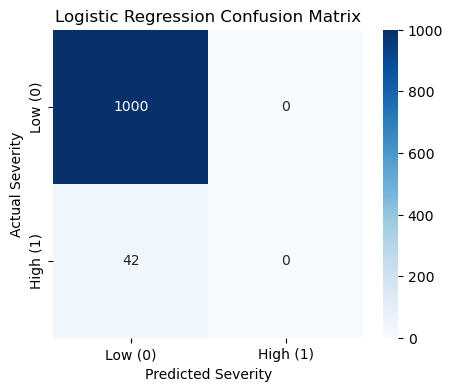

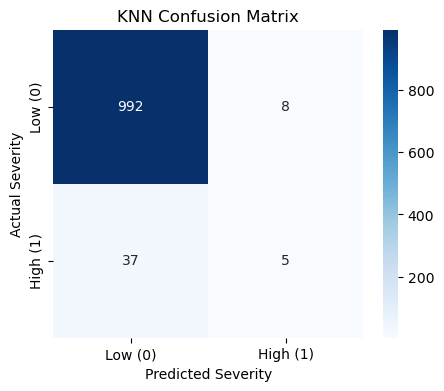

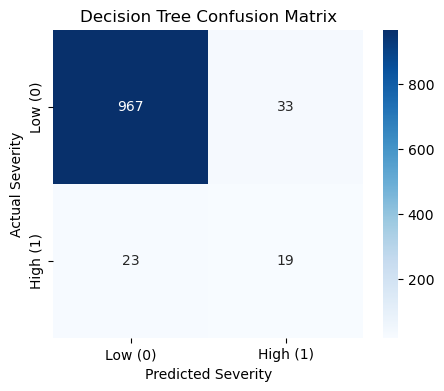

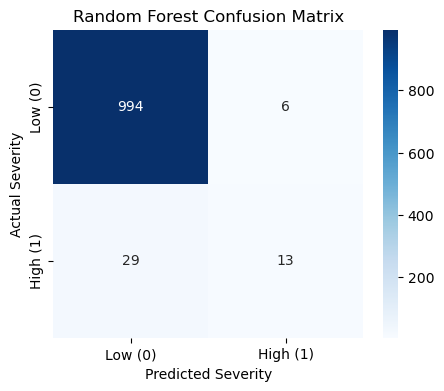

In [309]:
plot_confusion(y_test, y_pred_lr, "Logistic Regression")
plot_confusion(y_test, y_pred_knn, "KNN")
plot_confusion(y_test, y_pred_dt, "Decision Tree")
plot_confusion(y_test, y_pred_rf, "Random Forest")


In [311]:
metrics_dict = {
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "Random Forest"],
    "Recall (High Severity)": [
        classification_report(y_test, y_pred_lr, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_knn, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_dt, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"]
    ]
}

df_metrics = pd.DataFrame(metrics_dict)
df_metrics


,Model,Recall (High Severity)
0,Logistic Regression,0.000000
1,KNN,0.119048
2,Decision Tree,0.452381
3,Random Forest,0.309524


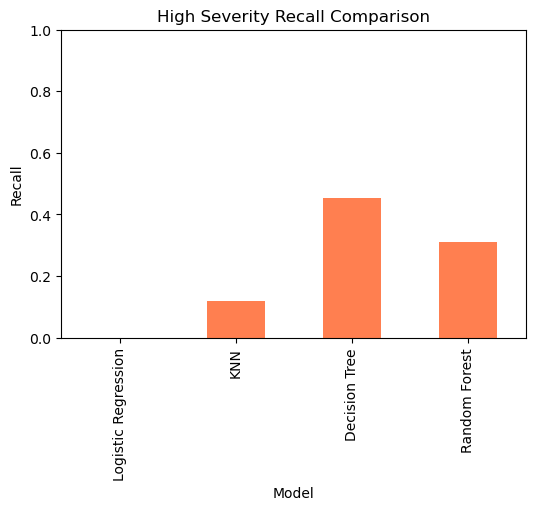

In [313]:
df_metrics.plot(
    x="Model",
    y="Recall (High Severity)",
    kind="bar",
    figsize=(6,4),
    legend=False,
    ylim=(0,1),
    color="coral"
)

plt.ylabel("Recall")
plt.title("High Severity Recall Comparison")
plt.show()


In [315]:
def predict_severity(manufacturer, subject, component, affected):
    # Create input dataframe
    input_data = pd.DataFrame({
        "Manufacturer": [manufacturer],
        "Subject": [subject],
        "Component": [component],
        "Potentially Affected": [affected]
    })

    # Encode categorical columns the SAME way
    for col in categorical_cols:
        le = LabelEncoder()
        le.fit(data[col])  # fit on original dataset
        if input_data[col][0] in le.classes_:
            input_data[col] = le.transform(input_data[col])
        else:
            input_data[col] = -1  # unseen category

    # Scale
    input_scaled = scaler.transform(input_data)

    # Predict
    pred = dt.predict(input_scaled)[0]

    return "High Severity Recall" if pred == 1 else "Low Severity Recall"


In [317]:
result = predict_severity(
    manufacturer="Volkswagen Group of America, Inc.",
    subject="High Voltage Battery May Catch Fire",
    component="ELECTRICAL SYSTEM",
    affected=50000
)

print("Predicted Severity:", result)


Predicted Severity: Low Severity Recall
